In [1]:
import openturns as ot
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

from normal import Normal
from lognormal import LogNormal
from gumbel import Gumbel
from beta import Beta

from truncatedDistribution import TruncatedDistribution
from jointdistribution import JointDistribution
from extendedtrnormal import ExtendedTrNormal
from extendedtrlognormal import ExtendedTrLogNormal 

<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_698618/2075494612.py:33: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel(xlabel="$\mu$", fontsize=22)
/tmp/ipykernel_698618/2075494612.py:34: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel(ylabel="$\sigma$", fontsize=22)
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


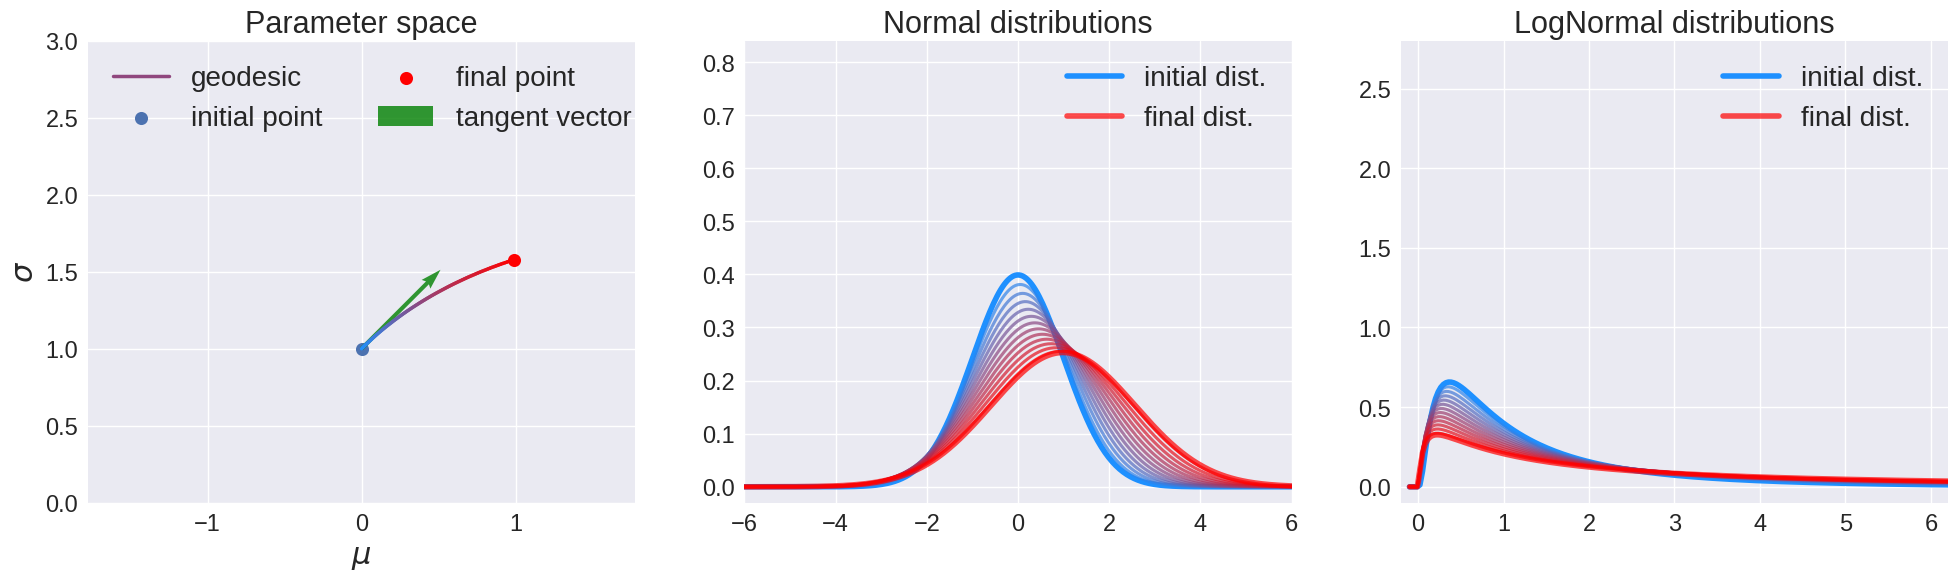

In [47]:
th0 = [0, 1]
f = Normal(th0[0], th0[1])  # central distribution
v_unnorm = np.array([1, 1])  
delta = 1

# normalize vector
l = np.sqrt(np.dot(np.transpose(v_unnorm),np.dot(f.fisherInformation(),v_unnorm)))
v = delta*(v_unnorm/l)


nb_pts = 100
disc_step = 8

geod = f._sequentialExponentialMap(v, nb_pts)
geod_params = np.array([np.array(g.getParameter()[0:2]) for g in geod])

cmap = LinearSegmentedColormap.from_list("custom", [ "dodgerblue", "red"], nb_pts)


plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax = ax.flatten()

ax[0].set_title("Parameter space", fontsize=22)
ax[1].set_title("Normal distributions", fontsize=22)
ax[2].set_title("LogNormal distributions", fontsize=22)

ax[0].tick_params('both', labelsize=17)
ax[1].tick_params('both', labelsize=17)
ax[2].tick_params('both', labelsize=17)

ax[0].set_xlabel(xlabel="$\mu$", fontsize=22)
ax[0].set_ylabel(ylabel="$\sigma$", fontsize=22)

ax[0].axis('equal')
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(0, 3)

ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-0.03, 0.84)

ax[2].set_xlim(-0.2, 6.2)
ax[2].set_ylim(-0.1, 2.8)

cmap_geod = LinearSegmentedColormap.from_list("custom", [ "dodgerblue", "red"], len(geod_params[:,0]))

for k in range(len(geod_params[:,0])):
    ax[0].plot(geod_params[k:k+2,0], geod_params[k:k+2, 1], lw=2.5, color=cmap(k/len(geod_params[:,0])))

# dummy plot for legend
ax[0].plot([], [], lw=2.5, color=cmap(0.5), label = "geodesic")

ax[0].scatter(th0[0], th0[1], label="initial point", lw=2.4)
ax[0].scatter(geod_params[-1,0], geod_params[-1, 1], label="final point", color="red", lw=2.4)
ax[0].quiver(th0[0], th0[1], v[0], v[1], angles='xy', lw=6, color="green", alpha=0.8, scale=4, scale_units="width", label=f"tangent vector") #[{v[0]:.2}, {v[1]:.2}]")# , marker=r'$\rightarrow$') #, scale=.01

#blue_line = mlines.Line2D([], [], color='red', marker=r'$\rightarrow$', markersize=20, linestyle='None')

# red_patch = mpatches.FancyArrow(0, 0, 0.3, 0, color='red', width=0.05)
# ax[0].legend([red_patch], ['vector'])

ax[0].legend(fontsize=20,loc = "upper left", ncols=2)
#ax[0].legend([blue_line], ['Velocity Vector'])

L = np.linspace(-6, 6, 300, endpoint=True)
# plot the initial distribution in the middle figure
ax[1].plot(L, [geod[0].computePDF(x) for x in L], lw=4, color='dodgerblue', label='initial dist.')

for i, g in enumerate(geod[1:]):
    if i>1 and i%disc_step==0:
        # plot progressive perturbations on middle figure
        ax[1].plot(L, [g.computePDF(x) for x in L], color=cmap(i), alpha=0.7, lw=2.2)

ax[1].plot(L, [geod[-1].computePDF(x) for x in L], color=cmap(i), alpha=0.7, lw=4, label='final dist.')

ax[1].legend(fontsize=20)


L_log = np.linspace(-0.1, 9, 300)
g = LogNormal(geod_params[0, 0], geod_params[0, 1])
ax[2].plot(L_log, [g.computePDF(x) for x in L_log], lw=4, color='dodgerblue', label='initial dist.')

for i, th in enumerate(geod_params[1:]):
    if i>1 and i%disc_step==0:
        g = LogNormal(th[0], th[1])
        # plot progressive perturbations on middle figure
        ax[2].plot(L_log, [g.computePDF(x) for x in L_log], color=cmap(i), alpha=0.7, lw=2.2)

g = LogNormal(geod_params[-1,0], geod_params[-1,1])
ax[2].plot(L_log, [g.computePDF(x) for x in L_log], color="red", alpha=0.7, lw=4, label='final dist.')
ax[2].legend(fontsize=20)

fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/chap_3_images/chap_3_geod_normal_v_{v_unnorm[0]}_{v_unnorm[1]}.pdf", dpi=600, bbox_inches='tight')


<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_698618/241059799.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel(xlabel="$\mu$", fontsize=22)
/tmp/ipykernel_698618/241059799.py:35: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel(ylabel="$\sigma$", fontsize=22)
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


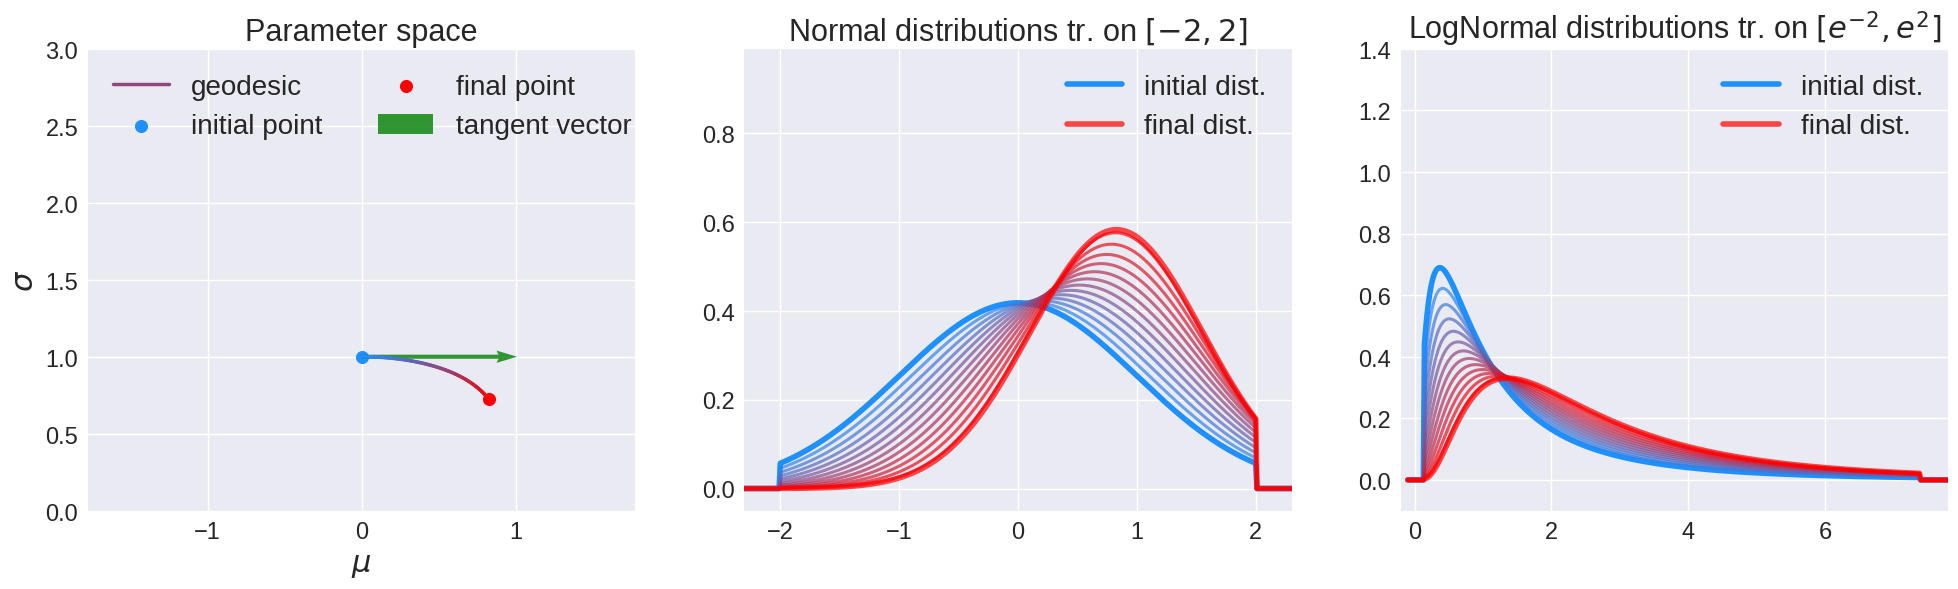

In [52]:
th0 = [0, 1]
interval = ot.Interval(-2, 2)
interval_log = ot.Interval(np.exp(-2), np.exp(2))

f = TruncatedDistribution(Normal(th0[0], th0[1]), interval)  # central distribution
v_unnorm = np.array([1, 0])  
delta = 1

# normalize vector
l = np.sqrt(np.dot(np.transpose(v_unnorm),np.dot(f.fisherInformation(),v_unnorm)))
v = delta*(v_unnorm/l)

nb_pts = 100
disc_step = 8

geod = f._sequentialExponentialMap(v, nb_pts)
geod_params = np.array([np.array(g.getParameter()[0:2]) for g in geod])

cmap = LinearSegmentedColormap.from_list("custom", [ "dodgerblue", "red"], nb_pts)


plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax = ax.flatten()

ax[0].set_title("Parameter space", fontsize=22)
ax[1].set_title(r"Normal distributions tr. on $[-2, 2]$", fontsize=22)
ax[2].set_title(r"LogNormal distributions tr. on $[e^{-2},e^2]$", fontsize=22)

ax[0].tick_params('both', labelsize=17)
ax[1].tick_params('both', labelsize=17)
ax[2].tick_params('both', labelsize=17)

ax[0].set_xlabel(xlabel="$\mu$", fontsize=22)
ax[0].set_ylabel(ylabel="$\sigma$", fontsize=22)

ax[0].axis('equal')
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(0, 3)

ax[1].set_xlim(-2.3, 2.3)
ax[1].set_ylim(-0.05, 0.99)

ax[2].set_xlim(-0.2, 7.8)
ax[2].set_ylim(-0.1, 1.4)

#ax[0].plot(geod_params[:,0], geod_params[:, 1], lw=2.5, label = "geodesic")

cmap_geod = LinearSegmentedColormap.from_list("custom", [ "dodgerblue", "red"], len(geod_params[:,0]))

for k in range(len(geod_params[:,0])):
    ax[0].plot(geod_params[k:k+2,0], geod_params[k:k+2, 1], lw=2.5, color=cmap(k/len(geod_params[:,0])))

# dummy plot for legend
ax[0].plot([], [], lw=2.5, color=cmap(0.5), label = "geodesic")

ax[0].scatter(th0[0], th0[1], label="initial point", lw=2.4, color='dodgerblue')
ax[0].scatter(geod_params[-1,0], geod_params[-1, 1], label="final point", color="red", lw=2.4)
ax[0].quiver(th0[0], th0[1], v[0], v[1], angles='xy', lw=4, color="green", alpha=0.8, scale=4, scale_units="width", label=f"tangent vector") #[{v[0]:.2}, {v[1]:.2}]")# , marker=r'$\rightarrow$') #, scale=.01

#blue_line = mlines.Line2D([], [], color='red', marker=r'$\rightarrow$', markersize=20, linestyle='None')

# red_patch = mpatches.FancyArrow(0, 0, 0.3, 0, color='red', width=0.05)
# ax[0].legend([red_patch], ['vector'])

ax[0].legend(fontsize=20,loc = "upper left", ncols=2)
#ax[0].legend([blue_line], ['Velocity Vector'])

L = np.linspace(-2.5, 2.5, 500, endpoint=True)
# plot the initial distribution in the middle figure
ax[1].plot(L, [geod[0].computePDF(x) for x in L], lw=4, color='dodgerblue', label='initial dist.')

for i, g in enumerate(geod[1:]):
    if i>1 and i%disc_step==0:
        # plot progressive perturbations on middle figure
        ax[1].plot(L, [g.computePDF(x) for x in L], color=cmap(i), alpha=0.7, lw=2.2)

ax[1].plot(L, [geod[-1].computePDF(x) for x in L], color=cmap(i), alpha=0.7, lw=4, label='final dist.')

ax[1].legend(fontsize=20)


L_log = np.linspace(-0.1, 8, 500)# np.exp(L) 
g = TruncatedDistribution(LogNormal(geod_params[0, 0], geod_params[0, 1]), interval_log)
ax[2].plot(L_log, [g.computePDF(x) for x in L_log], lw=4, color='dodgerblue', label='initial dist.')

for i, th in enumerate(geod_params[1:]):
    if i>1 and i%disc_step==0:
        g = TruncatedDistribution(LogNormal(th[0], th[1]), interval_log)
        # plot progressive perturbations on middle figure
        ax[2].plot(L_log, [g.computePDF(x) for x in L_log], color=cmap(i), alpha=0.7, lw=2.2)

g = TruncatedDistribution(LogNormal(geod_params[-1,0], geod_params[-1,1]), interval_log)
ax[2].plot(L_log, [g.computePDF(x) for x in L_log], color="red", alpha=0.7, lw=4, label='final dist.')
ax[2].legend(fontsize=20)

fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/chap_3_images/chap_3_geod_normal_tr_v_{v_unnorm[0]}_{v_unnorm[1]}_delta_{delta}.pdf", dpi=600, bbox_inches='tight')


In [163]:
np.exp(-7)

np.float64(0.0009118819655545162)

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_416223/2038493423.py:19: SyntaxWarning: invalid escape sequence '\s'
  ax[0].plot(L , [curve_non_tr[i].computePDF(x) for x in L], color=cmap(i), label=f"$\sigma$={s**.5:.2}")
/tmp/ipykernel_416223/2038493423.py:23: SyntaxWarning: invalid escape sequence '\s'
  ax[1].plot(L , [curve_tr[i].computePDF(x) for x in L], color=cmap(i), label=f"$\sigma$={s**.5:.2}", alpha=-.5/(nb_pts)*i+1)# +(nb_pts+0.5)/(nb_pts-1))


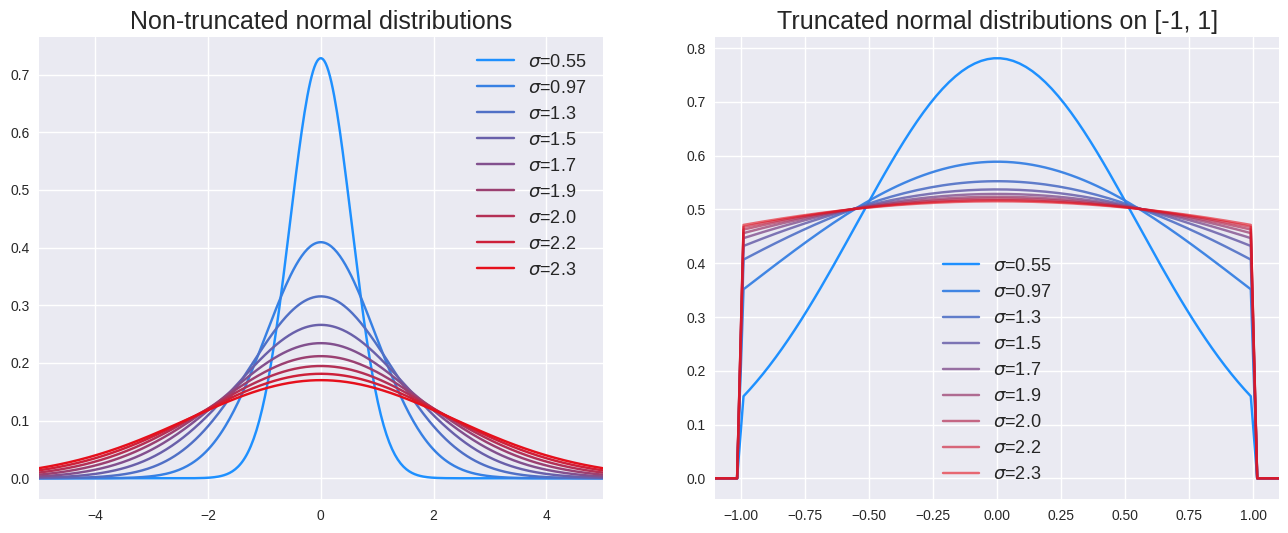

In [302]:

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax = ax.flatten()

arr_num = np.linspace(0.3, 5.5, 9)
nb_pts = 10

cmap = LinearSegmentedColormap.from_list("custom", [ "dodgerblue", "red"], nb_pts)

curve_non_tr = [Normal(0, float(s**.5)) for s in arr_num]
curve_tr = [TruncatedDistribution(Normal(0, float(s**0.5)), ot.Interval(-1, 1)) for s in arr_num]

L = np.linspace(-5, 5, 400)
ax[0].set_title("Non-truncated normal distributions", fontsize=18)
ax[1].set_title("Truncated normal distributions on [-1, 1]", fontsize=18)

for i, s in enumerate(arr_num):
    ax[0].plot(L , [curve_non_tr[i].computePDF(x) for x in L], color=cmap(i), label=f"$\sigma$={s**.5:.2}")
    ax[0].set_xlim(-5, 5)
    ax[0].legend(fontsize=13)

    ax[1].plot(L , [curve_tr[i].computePDF(x) for x in L], color=cmap(i), label=f"$\sigma$={s**.5:.2}", alpha=-.5/(nb_pts)*i+1)# +(nb_pts+0.5)/(nb_pts-1))
    ax[1].set_xlim(-1.1, 1.1)
    ax[1].legend(fontsize=13)


fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/GSI_images/tr_vs_nontr.pdf", dpi=600, bbox_inches='tight')

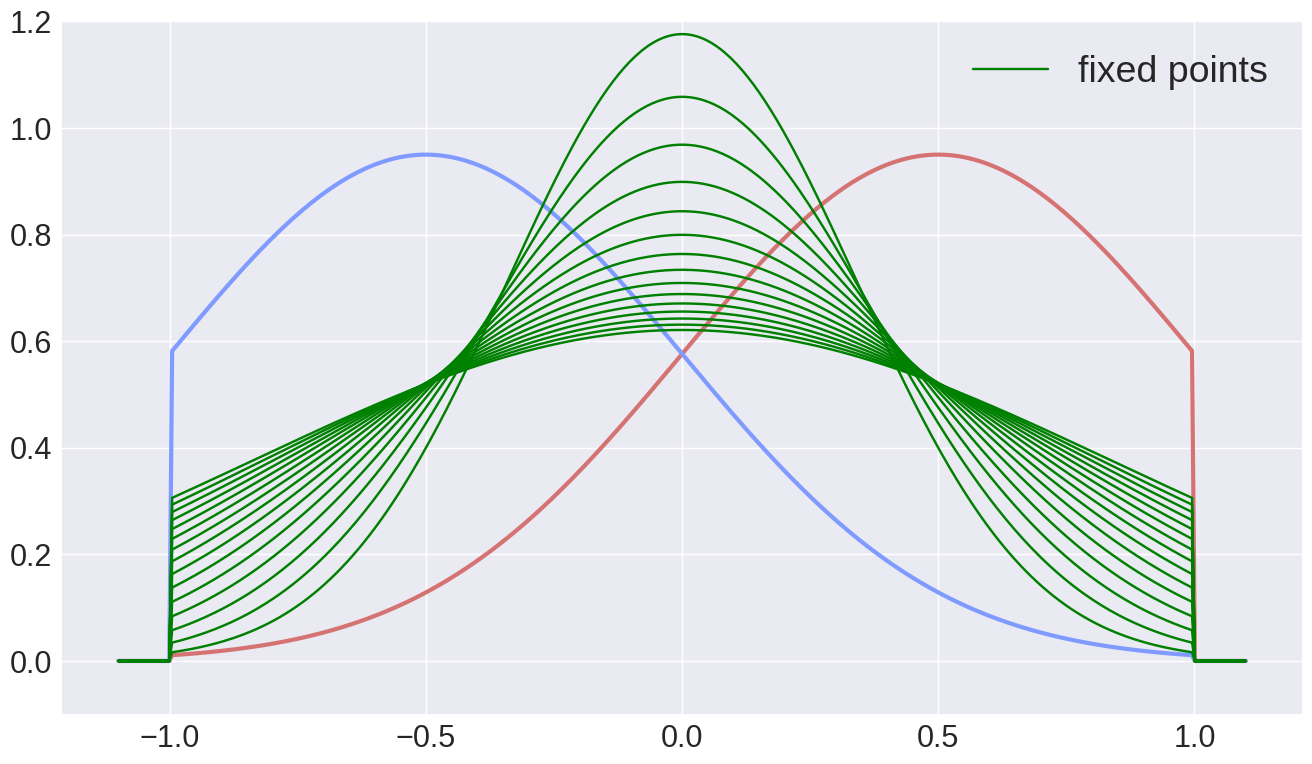

In [220]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(16, 9))

interval = ot.Interval(-1, 1)
m, s = 0.5, 0.5

left_tr_dist = TruncatedDistribution(Normal(m, s), interval)
right_tr_dist = TruncatedDistribution(Normal(-m, s), interval)

L = np.linspace(-1.1, 1.1, 400)

plt.plot(L, [left_tr_dist.computePDF(x) for x in L], color="#D57373", lw=3)
plt.plot(L, [right_tr_dist.computePDF(x) for x in L], color="#7F9BFF", lw=3)

plt.ylim(-0.1, 1.2)


arr_num = np.linspace(0.26, 0.8, 15)

for s in arr_num:
    f = TruncatedDistribution(Normal(0, s**.8), interval)
    plt.plot(L, [f.computePDF(x) for x in L], color="green")

plt.plot([], [], color='green', label="fixed points")
plt.legend(fontsize=22)
plt.tick_params('both', labelsize=22)
plt.legend(fontsize=27)

plt.savefig(f"/home/bketema/Python workspace/Multivariate_case/GSI_images/vertical_geodesic.pdf", dpi=600, bbox_inches='tight')

<>:56: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\m'
<>:96: SyntaxWarning: invalid escape sequence '\s'
<>:113: SyntaxWarning: invalid escape sequence '\d'
<>:142: SyntaxWarning: invalid escape sequence '\d'
<>:56: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\m'
<>:96: SyntaxWarning: invalid escape sequence '\s'
<>:113: SyntaxWarning: invalid escape sequence '\d'
<>:142: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_698618/1847411335.py:56: SyntaxWarning: invalid escape sequence '\d'
  ax[0].plot(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="red", alpha=0.7, lw=2.7, label=f"Sphere $\delta$={delta}")
/tmp/ipykernel_698618/1847411335.py:95: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel(xlabel="$\mu$", fontsize=19)
/tmp/ipykernel_698618/1847411335.py:96: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel(ylabel="$\sigma$", fontsize=19)
/t

[class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.480158] sigma=class=Point name=Unnamed dimension=1 values=[0.940598] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1], class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.493106] sigma=class=Point name=Unnamed dimension=1 values=[0.969778] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1], class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.502691] sigma=class=Point name=Unnamed dimension=1 values=[1.00033] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1], class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.508558] sigma=class=Poi

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


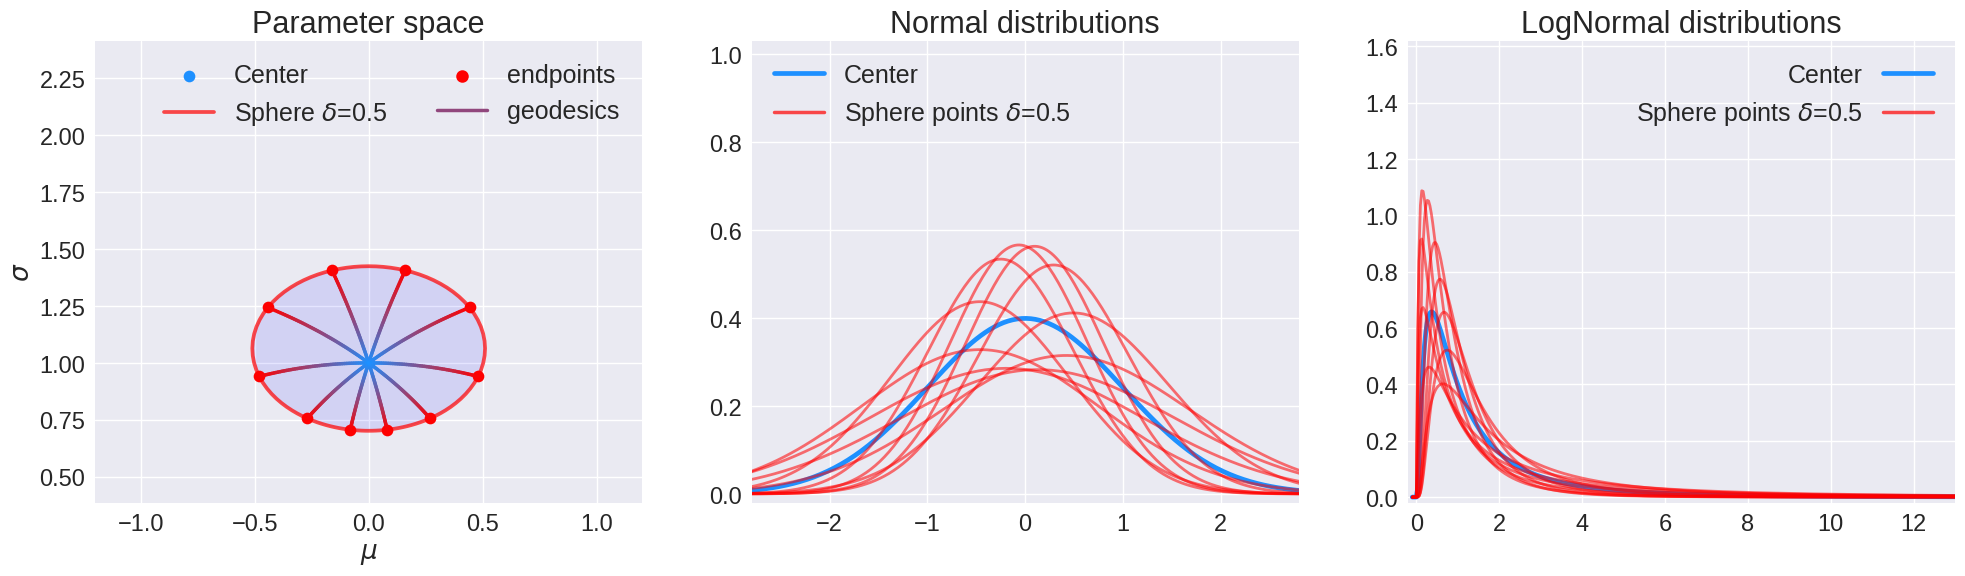

In [76]:
# create a loop over the number of concentric spheres

interval = ot.Interval(-2.5, 2.5)
interval_log = ot.Interval(np.exp(-2.5), np.exp(2.5))

th0 = [0, 1]


# Delta = np.linspace(.1, nb_concentric_sphere*.1, nb_concentric_sphere, endpoint=True)
# Delta = np.array(list(Delta) + [4.5])

# nb_concentric_sphere = 2

# D = [.1, .2, .3, .4, .42, .44, .46, .461]
# Delta= D[:nb_concentric_sphere]

#nb_concentric_sphere = nb_concentric_sphere + 1

#Delta = [0.4]
f = Normal(th0[0], th0[1])
# f = TruncatedDistribution(Normal(th0[0], th0[1]), interval)

# number of sphere points 
nb_pts = 100

# delta
delta = 0.5

spherePoints = f.sampleFisherRaoSphere(delta, nb_pts)
spherePoints.append(spherePoints[0])
fisher_sphere_params = spherePoints
print(spherePoints)

fisher_sphere_params = np.array([g.getParameter() for g in spherePoints])
# print(fisher_sphere_params)


plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax = ax.flatten()
L = np.linspace(-3.5, 3.5, 300, endpoint=True)

# set title
ax[0].set_title("Parameter space", fontsize=22)
ax[1].set_title(r"Normal distributions", fontsize=22)
ax[2].set_title(r"LogNormal distributions", fontsize=22)

### plot in parameter space

# plot the center point
ax[0].scatter(th0[0], th0[1], color='dodgerblue', lw=1.4, label="Center")

# plot th closed ball and sphere
ax[0].fill(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="blue", alpha=0.1)
ax[0].plot(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="red", alpha=0.7, lw=2.7, label=f"Sphere $\delta$={delta}")
#ax[0].fill([], [], color="blue", alpha=0.2, label=f"FR ball $\delta$={delta}")

# plot the geodesics
cmap_geod = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], 50)

V = np.linspace(0,2*np.pi,nb_pts, endpoint=False)

# plot the perturbed distributions
for i, param in enumerate(fisher_sphere_params[1:]):
    if i%10 == 0 and i!= nb_pts-1:
        # plot the geodesic curves from center to sphere on the left figure
        v = np.array([np.cos(V[i]),np.sin(V[i])])
        l_J = np.sqrt(np.dot(np.transpose(v),np.dot(f.fisherInformation(),v)))
        v_J = delta*(v/l_J)
        geodesic_curve = f._sequentialExponentialMap(v_J, 50)

        geodesic_curve = np.array([g.getParameter() for g in geodesic_curve])
        
        for k in range(50):
            ax[0].plot(geodesic_curve[k:k+2,0], geodesic_curve[k:k+2, 1], lw=2.5, color=cmap_geod(k/len(geodesic_curve)))
            
        ax[0].scatter(geodesic_curve[-1, 0], geodesic_curve[-1, 1], lw=1.4, color="red")

ax[0].scatter([], [], lw=2, color="red", label="endpoints")
ax[0].plot([], [], lw=2.5, color=cmap_geod(.5), label="geodesics")

# set axis limits, size, legend, etc.
ax[0].tick_params('both', labelsize=17)
ax[1].tick_params('both', labelsize=17)
ax[2].tick_params('both', labelsize=17)

ax[0].axis('equal')
ax[0].set_xlim(-1.2, 1.2)
ax[0].set_ylim(0, 2.8)

ax[0].legend(fontsize=18, loc='upper right', ncols=2)

# set x and y label 
ax[0].set_xlabel(xlabel="$\mu$", fontsize=19)
ax[0].set_ylabel(ylabel="$\sigma$", fontsize=19)

# for delta in Delta:
# plot the sphere with the delta-perturbed distributions

##### plot in distribution space : normal

# plot the initial dist
ax[1].plot(L, [f.computePDF(x) for x in L], color='dodgerblue', label="Center", lw=3.4)

# plot the perturbed distributions
for i, param in enumerate(fisher_sphere_params[1:]):
    if i%10 == 0 and i!= nb_pts-1:
        pert_dist = Normal(param[0], param[1])
        # pert_dist = TruncatedDistribution(Normal(param[0], param[1]), interval)
        ax[1].plot(L, [pert_dist.computePDF(x) for x in L], color="red", alpha=.55, lw=2)

ax[1].plot([], [], color="red", alpha=.7, lw=2.5, label=f"Sphere points $\delta$={delta}")#{delta:.2})")


ax[1].set_xlim(-2.8, 2.8)
ax[1].set_ylim(-0.02, 0.62)

ax[1].set_xlim(-2.8, 2.8)
ax[1].set_ylim(-0.02, 1.03)

ax[2].set_xlim(-0.2, 13)
ax[2].set_ylim(-0.02, 1.62)


ax[1].legend(fontsize=18, loc='upper left', markerfirst=True)

##### plot in distribution space : log-normal
L_log = np.linspace(-0.1, 13, 400)

# plot the initial dist
g = LogNormal(th0[0], th0[1])
ax[2].plot(L_log, [g.computePDF(x) for x in L_log], color='dodgerblue', label="Center", lw=3.4)

# plot the perturbed distributions
for i, param in enumerate(fisher_sphere_params[1:]):
    if i%10 == 0 and i!= nb_pts-1:
        # pert_dist = Normal(param[0], param[1])
        pert_dist = LogNormal(param[0], param[1])
        ax[2].plot(L_log, [pert_dist.computePDF(x) for x in L_log], color="red", alpha=.55, lw=2)

ax[2].plot([], [], color="red", alpha=.7, lw=2.5, label=f"Sphere points $\delta$={delta}")#{delta:.2})")

# ax[1].set_xlim(-2.3, 2.3)
# ax[1].set_ylim(-0.02, 0.8)

ax[2].legend(fontsize=18, loc='upper right', markerfirst=False)

fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/chap_3_images/spheres/chap_3_sphere_normal_lognormal.pdf", dpi=600, bbox_inches='tight')

<>:55: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\s'
<>:118: SyntaxWarning: invalid escape sequence '\d'
<>:139: SyntaxWarning: invalid escape sequence '\d'
<>:55: SyntaxWarning: invalid escape sequence '\d'
<>:100: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\s'
<>:118: SyntaxWarning: invalid escape sequence '\d'
<>:139: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_698618/3688071395.py:55: SyntaxWarning: invalid escape sequence '\d'
  ax[0].plot(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="red", alpha=0.8, lw=2.7, label=f"Sphere $\delta$={delta}")
/tmp/ipykernel_698618/3688071395.py:100: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel(xlabel="$\mu$", fontsize=19)
/tmp/ipykernel_698618/3688071395.py:101: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel(ylabel="$\sigma$", fontsize=

[class=TruncatedDistribution name=TruncatedDistribution distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.493448] sigma=class=Point name=Unnamed dimension=1 values=[0.933801] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[-2.5] upper bound=class=Point name=Unnamed dimension=1 values=[2.5] finite lower bound=[1] finite upper bound=[1] thresholdRealization=0.5, class=TruncatedDistribution name=TruncatedDistribution distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.511635] sigma=class=Point name=Unnamed dimension=1 values=[0.964169] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Un

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


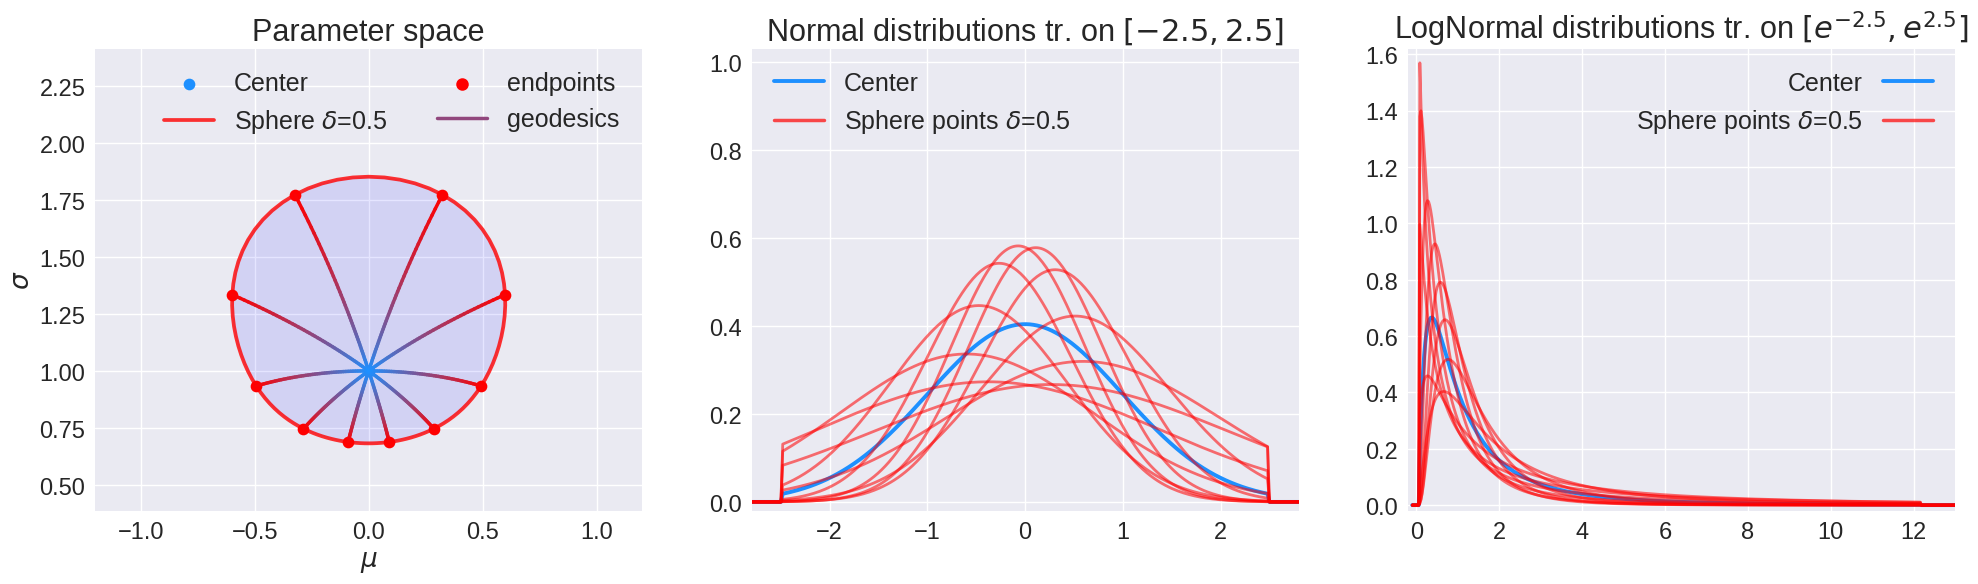

In [79]:
# create a loop over the number of concentric spheres
a, b = -2.5, 2.5
interval = ot.Interval(a, b)
interval_log = ot.Interval(np.exp(a), np.exp(b))

th0 = [0, 1]

# Delta = np.linspace(.1, nb_concentric_sphere*.1, nb_concentric_sphere, endpoint=True)
# Delta = np.array(list(Delta) + [4.5])

# nb_concentric_sphere = 2

# D = [.1, .2, .3, .4, .42, .44, .46, .461]
# Delta= D[:nb_concentric_sphere]

#nb_concentric_sphere = nb_concentric_sphere + 1

#Delta = [0.4]
# f = Normal(th0[0], th0[1])
f = TruncatedDistribution(Normal(th0[0], th0[1]), interval)

# number of sphere points 
nb_pts = 100

# delta
delta = 0.5

spherePoints = f.sampleFisherRaoSphere(delta, nb_pts)
spherePoints.append(spherePoints[0])
fisher_sphere_params = spherePoints
print(spherePoints)

fisher_sphere_params = np.array([g.getParameter() for g in spherePoints])
# print(fisher_sphere_params)


plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax = ax.flatten()
L = np.linspace(-2.8, 2.8, 300, endpoint=True)

# set title
ax[0].set_title("Parameter space", fontsize=22)
ax[1].set_title(r"Normal distributions tr. on $[-2.5, 2.5]$", fontsize=22)
ax[2].set_title(r"LogNormal distributions tr. on $[e^{-2.5}, e^{2.5}]$", fontsize=22)

### plot in parameter space

# plot the center point
ax[0].scatter(th0[0], th0[1], color='dodgerblue', lw=1.4, label="Center")

# plot th closed ball and sphere
ax[0].fill(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="blue", alpha=0.1)
ax[0].plot(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="red", alpha=0.8, lw=2.7, label=f"Sphere $\delta$={delta}")
#ax[0].fill([], [], color="blue", alpha=0.2, label=f"FR ball $\delta$={delta}")

# plot the geodesics
cmap_geod = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], 50)

V = np.linspace(0,2*np.pi,nb_pts, endpoint=False)

# plot the perturbed distributions
for i, param in enumerate(fisher_sphere_params[1:]):
    if i%10 == 0 and i!= nb_pts-1:
        # plot the geodesic curves from center to sphere on the left figure
        v = np.array([np.cos(V[i]),np.sin(V[i])])
        l_J = np.sqrt(np.dot(np.transpose(v),np.dot(f.fisherInformation(),v)))
        v_J = delta*(v/l_J)
        geodesic_curve = f._sequentialExponentialMap(v_J, 50)

        geodesic_curve = np.array([g.getParameter() for g in geodesic_curve])
        
        for k in range(50):
            ax[0].plot(geodesic_curve[k:k+2,0], geodesic_curve[k:k+2, 1], lw=2.5, color=cmap_geod(k/len(geodesic_curve)))
            
        ax[0].scatter(geodesic_curve[-1, 0], geodesic_curve[-1, 1], lw=1.4, color="red")

ax[0].scatter([], [], lw=2, color="red", label="endpoints")
ax[0].plot([], [], lw=2.5, color=cmap_geod(.5), label="geodesics")

# set axis limits, size, legend, etc.
ax[0].tick_params('both', labelsize=17)
ax[1].tick_params('both', labelsize=17)
ax[2].tick_params('both', labelsize=17)

ax[0].axis('equal')
ax[0].set_xlim(-1.2, 1.2)
ax[0].set_ylim(0, 2.8)

ax[1].set_xlim(-2.8, 2.8)
ax[1].set_ylim(-0.02, 1.03)

ax[2].set_xlim(-0.2, 13)
ax[2].set_ylim(-0.02, 1.62)

ax[0].legend(fontsize=18, loc='upper right', ncols=2)

# set x and y label 
ax[0].set_xlabel(xlabel="$\mu$", fontsize=19)
ax[0].set_ylabel(ylabel="$\sigma$", fontsize=19)

# for delta in Delta:
# plot the sphere with the delta-perturbed distributions

##### plot in distribution space : normal

# plot the initial dist
ax[1].plot(L, [f.computePDF(x) for x in L], color='dodgerblue', label="Center", lw=2.8)

# plot the perturbed distributions
for i, param in enumerate(fisher_sphere_params[1:]):
    if i%10 == 0 and i!= nb_pts-1:
        # pert_dist = Normal(param[0], param[1])
        pert_dist = TruncatedDistribution(Normal(param[0], param[1]), interval)
        ax[1].plot(L, [pert_dist.computePDF(x) for x in L], color="red", alpha=.55, lw=2)

ax[1].plot([], [], color="red", alpha=.7, lw=2.5, label=f"Sphere points $\delta$={delta}")#{delta:.2})")

# ax[1].set_xlim(-2.3, 2.3)
# ax[1].set_ylim(-0.02, 0.8)

ax[1].legend(fontsize=18, loc='upper left', markerfirst=True)

##### plot in distribution space : log-normal
L_log = np.linspace(-0.1, 13, 500)

# plot the initial dist
g = TruncatedDistribution(LogNormal(th0[0], th0[1]), interval_log)
ax[2].plot(L_log, [g.computePDF(x) for x in L_log], color='dodgerblue', label="Center", lw=2.8)

# plot the perturbed distributions
for i, param in enumerate(fisher_sphere_params[1:]):
    if i%10 == 0 and i!= nb_pts-1:
        # pert_dist = Normal(param[0], param[1])
        pert_dist = TruncatedDistribution(LogNormal(param[0], param[1]), interval_log)
        ax[2].plot(L_log, [pert_dist.computePDF(x) for x in L_log], color="red", alpha=.55, lw=2)

ax[2].plot([], [], color="red", alpha=.7, lw=2.5,  label=f"Sphere points $\delta$={delta}")#{delta:.2})")



# ax[1].set_xlim(-2.3, 2.3)
# ax[1].set_ylim(-0.02, 0.8)

ax[2].legend(fontsize=18, loc='upper right', markerfirst=False)

fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/chap_3_images/spheres/chap_3_sphere_tr_normal_lognormal.pdf", dpi=600, bbox_inches='tight')

<>:69: SyntaxWarning: invalid escape sequence '\d'
<>:74: SyntaxWarning: invalid escape sequence '\d'
<>:134: SyntaxWarning: invalid escape sequence '\m'
<>:135: SyntaxWarning: invalid escape sequence '\s'
<>:137: SyntaxWarning: invalid escape sequence '\m'
<>:138: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\d'
<>:74: SyntaxWarning: invalid escape sequence '\d'
<>:134: SyntaxWarning: invalid escape sequence '\m'
<>:135: SyntaxWarning: invalid escape sequence '\s'
<>:137: SyntaxWarning: invalid escape sequence '\m'
<>:138: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_698618/2184338949.py:69: SyntaxWarning: invalid escape sequence '\d'
  ax[0].plot(fisher_sphere_params_nontr[:,0], fisher_sphere_params_nontr[:,1], color=cmap(i/len(Delta)), alpha=0.8, lw=2.5, label=f"$\delta$={delta:.2}")
/tmp/ipykernel_698618/2184338949.py:74: SyntaxWarning: invalid escape sequence '\d'
  ax[1].plot(fisher_sphere_params_tr[:,0], fisher_sphere_p

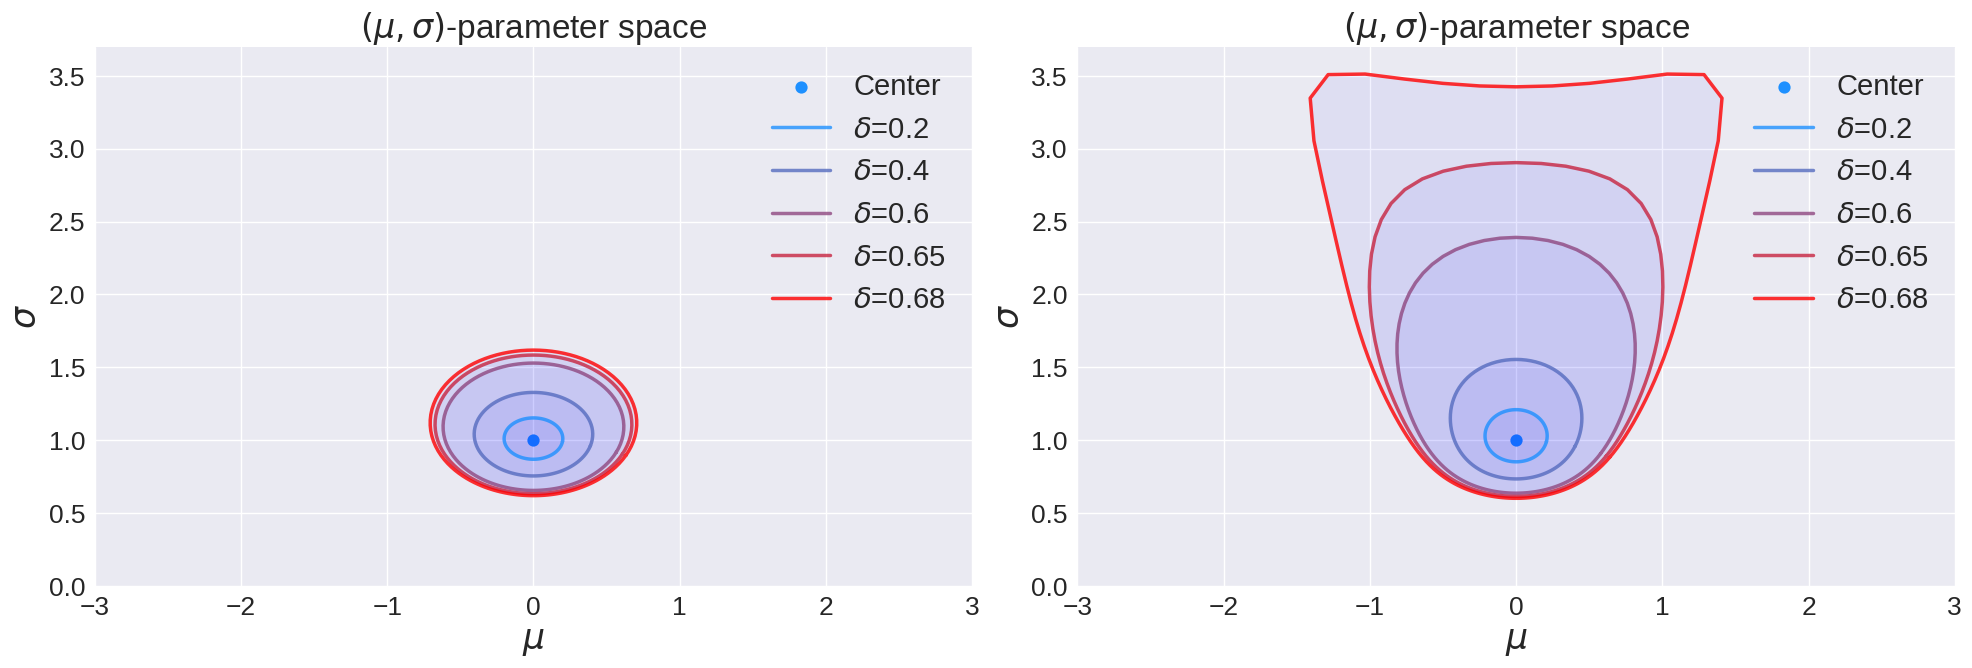

In [84]:
# create a loop over the number of concentric spheres
a, b = -2.5, 2.5
interval = ot.Interval(a, b)
interval_log = ot.Interval(np.exp(a), np.exp(b))

th0 = [0, 1]

# Delta = np.linspace(.1, nb_concentric_sphere*.1, nb_concentric_sphere, endpoint=True)
# Delta = np.array(list(Delta) + [4.5])

# nb_concentric_sphere = 2

# D = [.1, .2, .3, .4, .42, .44, .46, .461]
# Delta= D[:nb_concentric_sphere]

#nb_concentric_sphere = nb_concentric_sphere + 1

#Delta = [0.4]
f_nontr = Normal(th0[0], th0[1])
f_tr = TruncatedDistribution(Normal(th0[0], th0[1]), interval)

# number of_tr sphere points 
nb_pts = 120

# delta

Delta = [.2, .4, .6, 
    .65, .68] #i*.1 for i in range(1, 7)]

cmap = LinearSegmentedColormap.from_list("custom", [ "dodgerblue", "red"], len(Delta))

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 2, figsize=(24, 7))
fig.subplots_adjust(wspace=0.12)

ax = ax.flatten()

# plot the center point
ax[0].scatter(th0[0], th0[1], color='dodgerblue', lw=1.8, label="Center")
ax[1].scatter(th0[0], th0[1], color='dodgerblue', lw=1.8, label="Center")



for i, delta in enumerate(Delta):
    # tr case
    spherePoints_tr = f_tr.sampleFisherRaoSphere(delta, nb_pts)
    spherePoints_tr.append(spherePoints_tr[0])
    fisher_sphere_params_tr = spherePoints_tr

    # non-tr case
    spherePoints_nontr = f_nontr.sampleFisherRaoSphere(delta, nb_pts)
    spherePoints_nontr.append(spherePoints_nontr[0])
    fisher_sphere_params_tr = spherePoints_nontr

    # print(spherePoints)

    fisher_sphere_params_tr = np.array([g.getParameter() for g in spherePoints_tr])
    fisher_sphere_params_nontr = np.array([g.getParameter() for g in spherePoints_nontr])

    # print(fisher_sphere_params)



    ### plot in parameter space

    # non_tr case 
    # plot th closed ball and sphere
    ax[0].fill(fisher_sphere_params_nontr[:,0], fisher_sphere_params_nontr[:,1], color="blue", alpha=0.05)
    ax[0].plot(fisher_sphere_params_nontr[:,0], fisher_sphere_params_nontr[:,1], color=cmap(i/len(Delta)), alpha=0.8, lw=2.5, label=f"$\delta$={delta:.2}")
    #ax[0].fill([], [], color="blue", alpha=0.2, label=f"FR ball $\delta$={delta}")

    # tr case
    ax[1].fill(fisher_sphere_params_tr[:,0], fisher_sphere_params_tr[:,1], color="blue", alpha=0.05)
    ax[1].plot(fisher_sphere_params_tr[:,0], fisher_sphere_params_tr[:,1], color=cmap(i/len(Delta)), alpha=0.8, lw=2.5, label=f"$\delta$={delta:.2}")
    #ax[0].fill([], [], color="blue", alpha=0.2, label=f"FR ball $\delta$={delta}")



# plot the geodesics for both tr and non tr

# cmap_geod = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], 50)

# V = np.linspace(0,2*np.pi,nb_pts, endpoint=True)

# # plot the perturbed distributions
# for i, param in enumerate(fisher_sphere_params[1:]):
#     if i%10 == 0 and i!= nb_pts-1:
#         # plot the geodesic curves from center to sphere on the left figure
#         v = np.array([np.cos(V[i]),np.sin(V[i])])
#         l_J = np.sqrt(np.dot(np.transpose(v),np.dot(f_nontr.fisherInformation(),v)))
#         v_J = Delta[-1]*(v/l_J)
#         geodesic_curve_nontr = f_nontr._sequentialExponentialMap(v_J, 50)
#         geodesic_curve_tr = f_tr._sequentialExponentialMap(v_J, 50)

#         geodesic_curve_nontr = np.array([g.getParameter() for g in geodesic_curve_nontr])
#         geodesic_curve_tr = np.array([g.getParameter() for g in geodesic_curve_tr])
        
#         for k in range(50):
#             ax[0].plot(geodesic_curve_nontr[k:k+2,0], geodesic_curve_nontr[k:k+2, 1], lw=1.5, color=cmap_geod(k/len(geodesic_curve_nontr)))
#             ax[1].plot(geodesic_curve_tr[k:k+2,0], geodesic_curve_tr[k:k+2, 1], lw=1.5, color=cmap_geod(k/len(geodesic_curve_tr)))
            
#         ax[0].scatter(geodesic_curve_nontr[-1, 0], geodesic_curve_nontr[-1, 1], lw=1.4, color="red")
#         ax[1].scatter(geodesic_curve_tr[-1, 0], geodesic_curve_tr[-1, 1], lw=1.4, color="red")

# ax[0].scatter([], [], lw=2, color="red", label="endpoints")
# ax[0].plot([], [], lw=2.5, color=cmap_geod(.5), label="geodesics")

# ax[1].scatter([], [], lw=2, color="red", label="endpoints")
# ax[1].plot([], [], lw=2.5, color=cmap_geod(.5), label="geodesics")


# set axis limits, size, legend, title, etc.

# set title
ax[0].set_title(r"$(\mu,\sigma)$-parameter space", fontsize=24)
ax[1].set_title(r"$(\mu,\sigma)$-parameter space", fontsize=24)


ax[0].tick_params('both', labelsize=19)
ax[1].tick_params('both', labelsize=19)

ax[0].axis('equal')
ax[0].set_ylim(0, 3.7)
ax[0].set_xlim(-3, 3)

ax[1].axis('equal')
ax[1].set_ylim(0, 3.7)
ax[1].set_xlim(-3, 3)

ax[0].legend(fontsize=21, loc='upper right', ncols=1)
ax[1].legend(fontsize=21, loc='upper right', ncols=1)

# set x and y label 
ax[0].set_xlabel(xlabel="$\mu$", fontsize=25)
ax[0].set_ylabel(ylabel="$\sigma$", fontsize=25)

ax[1].set_xlabel(xlabel="$\mu$", fontsize=25)
ax[1].set_ylabel(ylabel="$\sigma$", fontsize=25)
# for delta in Delta:
# plot the sphere with the delta-perturbed distributions



fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/chap_3_images/spheres/tr_and_nontr_sphere_normal_fam.pdf", dpi=600, bbox_inches='tight')

<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:90: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:90: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_698618/325227019.py:37: SyntaxWarning: invalid escape sequence '\d'
  ax[0].plot(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="red", alpha=0.8, lw=2., label=f"Sphere $\delta$={delta}")
/tmp/ipykernel_698618/325227019.py:90: SyntaxWarning: invalid escape sequence '\d'
  ax[1].plot([], [], color="red", alpha=.6, lw=2.5, label=f"Sphere points $\delta$={delta}")#{delta:.2})")


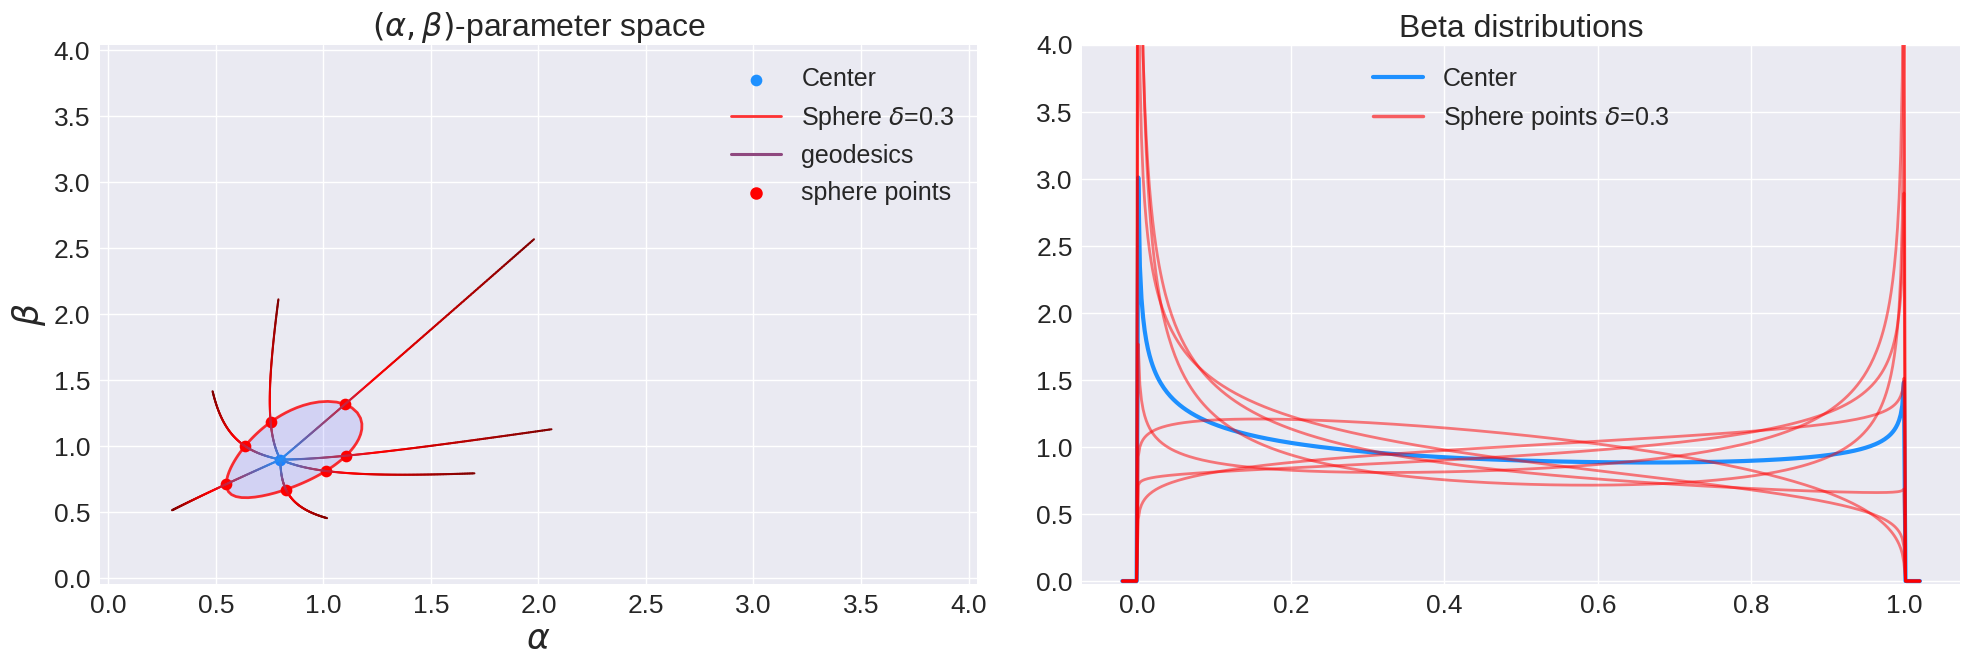

In [108]:
th0 = [0.8, 0.9]

f = Beta(th0[0], th0[1], 0, 1)
# f = TruncatedDistribution(Normal(th0[0], th0[1]), interval)

# number of sphere points 
nb_pts = 80

# delta
delta = 0.3

spherePoints = f.sampleFisherRaoSphere(delta, nb_pts)
spherePoints.append(spherePoints[0])
fisher_sphere_params = spherePoints

fisher_sphere_params = np.array([g.getParameter() for g in spherePoints])
# print(fisher_sphere_params)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 2, figsize=(24, 7))
fig.subplots_adjust(wspace=0.12)

ax = ax.flatten()
L = np.linspace(-0.02, 1.02, 500, endpoint=True)

# set title
ax[0].set_title(r"$(\alpha,\beta)$-parameter space", fontsize=23)
ax[1].set_title(r"Beta distributions", fontsize=23)

### plot in parameter space

# plot the center point
ax[0].scatter(th0[0], th0[1], color='dodgerblue', lw=1.4, label="Center")

# plot th closed ball and sphere
ax[0].fill(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="blue", alpha=0.1)
ax[0].plot(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="red", alpha=0.8, lw=2., label=f"Sphere $\delta$={delta}")
#ax[0].fill([], [], color="blue", alpha=0.2, label=f"FR ball $\delta$={delta}")

# set axis limits, size, legend, etc.
ax[0].tick_params('both', labelsize=19)
ax[1].tick_params('both', labelsize=19)

# ax[0].axis('equal')
ax[0].set_xlim(-0.04, 4.04)
ax[0].set_ylim(-0.04, 4.04)

# set x and y label 
ax[0].set_xlabel(xlabel=r"$\alpha$", fontsize=25)
ax[0].set_ylabel(ylabel=r"$\beta$", fontsize=25)

# for delta in Delta:
# plot the sphere with the delta-perturbed distributions

##### plot in distribution space : normal

# plot the initial dist
ax[1].plot(L, [f.computePDF(x) for x in L], color='dodgerblue', label="Center", lw=3)

# print(f.exponentialMap([0, 1], curve=True))
cmap_geod = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], len(f.exponentialMap([0, 1], curve=True)[0]))
cmap_geod_ext = LinearSegmentedColormap.from_list("custom", ["red", "black"], len(f.exponentialMap([0, 1], curve=True)[0]))


V = np.linspace(0,2*np.pi,nb_pts, endpoint=False)

# plot the perturbed distributions
for i, param in enumerate(fisher_sphere_params[1:]):
    if i%12 == 0 and i!= nb_pts-1:
        # plot the geodesic curves from center to sphere on the left figure
        v = np.array([np.cos(V[i]),np.sin(V[i])])
        l_J = np.sqrt(np.dot(np.transpose(v),np.dot(f.fisherInformation(),v)))
        v_J = delta*(v/l_J)
        alpha_t, beta_t = f.exponentialMap(2.7*v_J, curve=True)
        
        for k in range(len(alpha_t)):
            if k < len(alpha_t)/2:
                ax[0].plot(alpha_t[k:k+2], beta_t[k:k+2], lw=1.5, color=cmap_geod(2*k/len(alpha_t)))
            else:
                ax[0].plot(alpha_t[k:k+2], beta_t[k:k+2], lw=1.5, color=cmap_geod_ext(k-int(len(alpha_t)/2)) )                

        ax[0].scatter(alpha_t[int(len(alpha_t)/2.7)], beta_t[int(len(alpha_t)/2.7)], lw=1.4, color="red")

        # plot the geodesic endpoints on the right figure
        pert_dist = Beta(param[0], param[1], 0, 1)
        ax[1].plot(L, [pert_dist.computePDF(x) for x in L], color="red", alpha=.5, lw=2.)

ax[0].plot([], [], lw=2.2, color=cmap_geod(0.5), label="geodesics")
ax[0].scatter([], [], lw=2., color="red", label="sphere points")
ax[1].plot([], [], color="red", alpha=.6, lw=2.5, label=f"Sphere points $\delta$={delta}")#{delta:.2})")

# ax[1].set_xlim(-2, 2.8)
# ax[1].set_ylim(-0.02, 0.62)

# ax[1].set_xlim(-2.8, 2.8)

ax[1].set_ylim(-0.02, 4)


ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18, loc='upper center', markerfirst=True)


fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/chap_3_images/spheres/chap_3_sphere_beta_case_2_{th0[0]}_{th0[1]}.pdf", dpi=600, bbox_inches='tight')

In [ ]:
th0 = [0, 1]
interval = ot.Interval(-2, 2)
interval_log = ot.Interval(np.exp(-2), np.exp(2))

f = Beta(1, 1, 0, 1)  # central distribution
v_unnorm = np.array([1, 1])  
delta = 0.1

# normalize vector
l = np.sqrt(np.dot(np.transpose(v_unnorm),np.dot(f.fisherInformation(),v_unnorm)))
v = delta*(v_unnorm/l)

nb_pts = 100
disc_step = 8

geod = f._sequentialExponentialMap(v, nb_pts)
geod_params = np.array([np.array(g.getParameter()[0:2]) for g in geod])

cmap = LinearSegmentedColormap.from_list("custom", [ "dodgerblue", "red"], nb_pts)


plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 1, figsize=(24, 9))
ax = ax.flatten()

ax[0].set_title("Parameter space", fontsize=22)
ax[1].set_title(r"Normal distributions tr. on $[-2, 2]$", fontsize=22)

ax[0].tick_params('both', labelsize=17)
ax[1].tick_params('both', labelsize=17)

ax[0].set_xlabel(xlabel="$\mu$", fontsize=22)
ax[0].set_ylabel(ylabel="$\sigma$", fontsize=22)

ax[0].axis('equal')
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(0, 3)

ax[1].set_xlim(-2.3, 2.3)
ax[1].set_ylim(-0.05, 0.99)

ax[0].plot(geod_params[:,0], geod_params[:, 1], lw=2.5, label = "geodesic")
ax[0].scatter(th0[0], th0[1], label="initial point", lw=2, color='dodgerblue')
ax[0].scatter(geod_params[-1,0], geod_params[-1, 1], label="final point", color="red", lw=2)
ax[0].quiver(th0[0], th0[1], v[0], v[1], angles='xy', lw=4, color="green", alpha=0.8, scale=4, scale_units="width", label=f"tangent vector") #[{v[0]:.2}, {v[1]:.2}]")# , marker=r'$\rightarrow$') #, scale=.01

#blue_line = mlines.Line2D([], [], color='red', marker=r'$\rightarrow$', markersize=20, linestyle='None')

# red_patch = mpatches.FancyArrow(0, 0, 0.3, 0, color='red', width=0.05)
# ax[0].legend([red_patch], ['vector'])

ax[0].legend(fontsize=20,loc = "upper left", ncols=2)
#ax[0].legend([blue_line], ['Velocity Vector'])

L = np.linspace(-0.02, 1.02, 500, endpoint=True)
# plot the initial distribution in the middle figure
ax[1].plot(L, [geod[0].computePDF(x) for x in L], lw=4, color='dodgerblue', label='initial dist.')

for i, g in enumerate(geod[1:]):
    if i>1 and i%disc_step==0:
        # plot progressive perturbations on middle figure
        ax[1].plot(L, [g.computePDF(x) for x in L], color=cmap(i), alpha=0.7, lw=2.2)

ax[1].plot(L, [geod[-1].computePDF(x) for x in L], color=cmap(i), alpha=0.7, lw=4, label='final dist.')

ax[1].legend(fontsize=20)

# fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/chap_3_images/chap_3_geod_normal_tr_v_{v_unnorm[0]}_{v_unnorm[1]}_delta_{delta}.pdf", dpi=600, bbox_inches='tight')


<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_570333/2187599153.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel(xlabel="$\mu$", fontsize=22)
/tmp/ipykernel_570333/2187599153.py:33: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel(ylabel="$\sigma$", fontsize=22)
/tmp/ipykernel_570333/2187599153.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel(xlabel="$\mu$", fontsize=22)
/tmp/ipykernel_570333/2187599153.py:33: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel(ylabel="$\sigma$", fontsize=22)


AttributeError: 'Beta' object has no attribute '_sequentialExponentialMap'

<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:72: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:72: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_550763/1421059751.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel(xlabel="$\mu$", fontsize=19)
/tmp/ipykernel_550763/1421059751.py:45: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel(ylabel="$\sigma$", fontsize=19)
/tmp/ipykernel_550763/1421059751.py:72: SyntaxWarning: invalid escape sequence '\d'
  ax[0].fill([], [], color="blue", alpha=0.2, label=f"FR ball $\delta$={0.461}")#Delta[-1]:.2}")


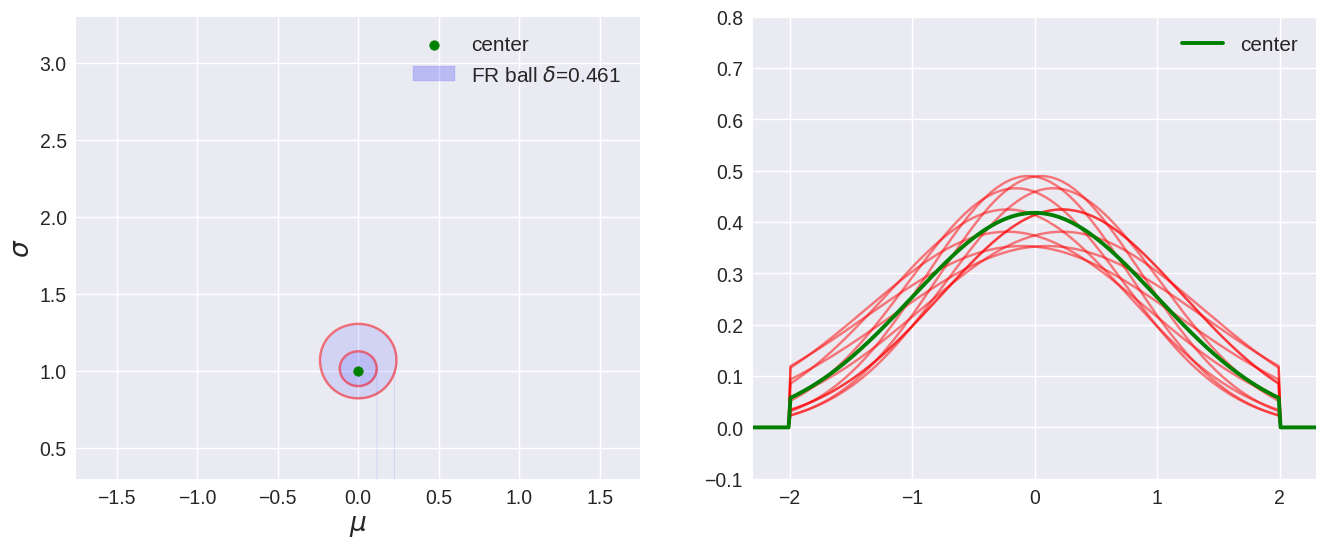

In [230]:
# create a loop over the number of concentric spheres

interval = ot.Interval(-2, 2)
th0 = [0, 1]



# Delta = np.linspace(.1, nb_concentric_sphere*.1, nb_concentric_sphere, endpoint=True)
# Delta = np.array(list(Delta) + [4.5])

nb_concentric_sphere = 2

D = [.1, .2, .3, .4, .42, .44, .46, .461]
Delta= D[:nb_concentric_sphere]


#nb_concentric_sphere = nb_concentric_sphere + 1

#Delta = [0.4]
# f = Normal(th0[0], th0[1])
f = TruncatedDistribution(Normal(th0[0], th0[1]), interval)

# number of sphere points 
nb_pts = 100

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax = ax.flatten()
L = np.linspace(-2.3, 2.3, 300, endpoint=True)


# ax[0].scatter(th0[0], th0[1], color="blue", label="center")
ax[0].tick_params('both', labelsize=14)
ax[1].tick_params('both', labelsize=14)

#ax[0].axis('equal')
ax[0].set_xlim(-1.75, 1.75)
ax[0].set_ylim(0.3, 3.3)

ax[1].set_xlim(-2.3, 2.3)
ax[1].set_ylim(-0.1, 0.8)

ax[0].set_xlabel(xlabel="$\mu$", fontsize=19)
ax[0].set_ylabel(ylabel="$\sigma$", fontsize=19)

for delta in Delta:

    # plot the sphere with the delta-perturbed distributions
    sphereParams = f.sampleFisherRaoSphere(delta, nb_pts)
    sphereParams.append(sphereParams[0])
    fisher_sphere_params = np.array(sphereParams)
    ax[0].fill_between(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="blue", alpha=0.1)#, edgecolor='red')
    ax[0].plot(fisher_sphere_params[:,0], fisher_sphere_params[:,1], color="red", alpha=0.5)


    if delta == Delta[-1]:
    # plot the perturbed distributions on the right
        for i, param in enumerate(sphereParams):
            if i%10 == 0 and i!= nb_pts-1:
                # pert_dist = Normal(param[0], param[1])
                pert_dist = TruncatedDistribution(Normal(param[0], param[1]), interval)
                ax[1].plot(L, [pert_dist.computePDF(x) for x in L], color="red", alpha=0.5)

        #ax[1].plot([], [], color="red", alpha=.5, label=f"Sphere points ($\delta$={0.461})")#{delta:.2})")


# plot the nominal parameter and distribution
ax[0].scatter(th0[0], th0[1], color='g', label="center")
ax[1].plot(L, [f.computePDF(x) for x in L], 'g', label="center", lw=2.8)

ax[0].fill([], [], color="blue", alpha=0.2, label=f"FR ball $\delta$={0.461}")#Delta[-1]:.2}")

ax[0].legend(fontsize=15, loc='upper right')
ax[1].legend(fontsize=15, loc='upper right')


fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/GSI_images/sphere_perturbed_{nb_concentric_sphere}.pdf", dpi=600, bbox_inches='tight')

In [11]:
f = Normal(0, 1)
# f = TruncatedDistribution(Normal(th0[0], th0[1]), interval)

f.sampleFisherRaoSphere(delta=0.1, nbPts=10)

AttributeError: 'float' object has no attribute 'getLowerBound'

In [16]:
def ackley(X, d=2, a=20, b=0.2, c=2*np.pi):
    """
    Compute the Ackley function (function obtained from ChatGPT).

    Parameters
    ----------
    x : array-like
        Input vector (list or numpy array)
    a, b, c : float, optional
        Ackley function parameters (default: 20, 0.2, 2π)

    Returns
    -------
    float
        Function value f(x)
    """
    x = np.array(X)
    d = x.size
    sum_sq = np.sum(x ** 2)
    sum_cos = np.sum(np.cos(c*x))
    
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / d))
    term2 = -np.exp(sum_cos / d)
    
    return [-(term1 + term2 + a + np.e)]

ackleyOT = ot.PythonFunction(2, 1, lambda x: ackley(x, d=2))


In [17]:
interval = ot.Interval(-5, 5)
f1 = TruncatedDistribution(Normal(0, 1), interval)
f2 = Gumbel(1, 2)

F = ot.JointDistribution([f1, f2], ot.IndependentCopula(2))

X = F.getSample(1000)

Y = np.array(ackleyOT(X)).transpose()[0]


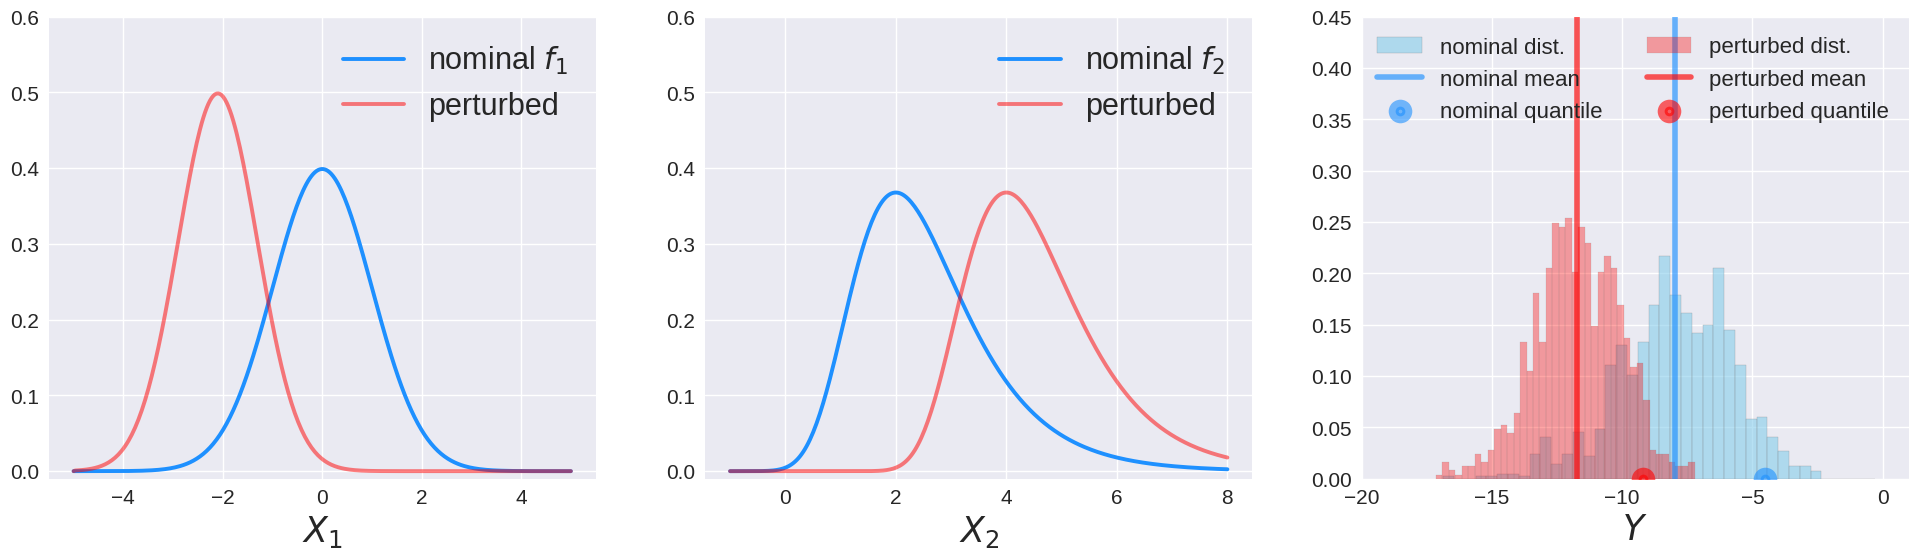

In [89]:

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax = ax.flatten()

interval = ot.Interval(-5, 5)
f1 = TruncatedDistribution(Normal(0, 1), interval)
f2 = Gumbel(1, 2)

L1 = np.linspace(-5, 5, 300)
L2 = np.linspace(-1, 8, 300)

ax[0].tick_params('both', labelsize=13)
ax[1].tick_params('both', labelsize=13)
ax[2].tick_params('both', labelsize=13)

ax[0].plot(L1, [f1.computePDF(x) for x in L1], color="dodgerblue", lw=2.8, label=r"nominal $f_1$")
ax[1].plot(L2, [f2.computePDF(x) for x in L2], color="dodgerblue", lw=2.8, label=r"nominal $f_2$") 

ax[0].legend(fontsize=22)
ax[1].legend(fontsize=22)

ax[0].set_xlabel(xlabel="$X_1$", fontsize=22)
ax[1].set_xlabel(xlabel="$X_2$", fontsize=22)
# ax[0].set_ylabel(ylabel="$\sigma$", fontsize=19)

F = ot.JointDistribution([f1, f2], ot.IndependentCopula(2))

X = F.getSample(1000)
Y = np.array(ackleyOT(X)).transpose()[0]

quant_blue = np.quantile(Y, 0.95)
mean_blue = np.mean(Y)



Y_min = Y.min()
Y_max = Y.max()

bin_width = (Y_max - Y_min)/40
bins = np.arange(Y_min, Y_max + bin_width, bin_width)


ax[2].hist(Y, bins=bins, 
         orientation='vertical', 
         density=True, color='skyblue', label="nominal dist.",
         edgecolor = 'gray', alpha=0.6)

ax[2].plot([mean_blue, mean_blue], [0, 2], color='dodgerblue', alpha=0.65, lw=4, label="nominal mean")

ax[2].scatter([quant_blue], [0], color = 'dodgerblue', lw=10, alpha=0.6, label='nominal quantile')


ax[2].set_xlabel(xlabel=r"$Y=G(X_1,X_2)$", fontsize=22)

ax[2].legend(fontsize=22)



#### perturbed distributions

f1 = TruncatedDistribution(Normal(-2.1, 0.8), interval)
f2 = Gumbel(1, 4)


L1 = np.linspace(-5, 5, 300)
L2 = np.linspace(-1, 8, 300)

ax[0].tick_params('both', labelsize=15)
ax[1].tick_params('both', labelsize=15)
ax[2].tick_params('both', labelsize=15)

ax[0].plot(L1, [f1.computePDF(x) for x in L1], color="red", lw=2.8, label="perturbed", alpha=0.5)
ax[1].plot(L2, [f2.computePDF(x) for x in L2], color="red", lw=2.8, label="perturbed", alpha=0.5) 

ax[0].legend(fontsize=22)
ax[1].legend(fontsize=22)

ax[1].set_ylim(-0.01, 0.6)
ax[0].set_ylim(-0.01, 0.6)

ax[0].set_xlabel(xlabel="$X_1$", fontsize=25)
ax[1].set_xlabel(xlabel="$X_2$", fontsize=25)
# ax[0].set_ylabel(ylabel="$\sigma$", fontsize=19)

F = ot.JointDistribution([f1, f2], ot.IndependentCopula(2))

X = F.getSample(1000)
Y = np.array(ackleyOT(X)).transpose()[0]

quant_red = np.quantile(Y, 0.95)
mean_red = np.mean(Y)

Y_min = Y.min()
Y_max = Y.max()

bin_width = (Y_max - Y_min)/40
bins = np.arange(Y_min, Y_max + bin_width, bin_width)


ax[2].hist(Y, bins=bins, 
         orientation='vertical', 
         density=True, color='red', label="perturbed dist.",
         edgecolor = 'gray', alpha=0.35)

ax[2].plot([mean_red, mean_red], [0, 2], alpha=0.65, lw=4, color='red', label="perturbed mean")
ax[2].scatter([quant_red], [0], color = 'red', lw=10, alpha=0.6, label='perturbed quantile')

ax[2].set_xlim(-20, 1)
ax[2].set_ylim(0, 0.45)

ax[2].set_xlabel(xlabel=r"$Y$", fontsize=25)

ax[2].legend(fontsize=16, ncols=2)

fig.savefig(f"/home/bketema/Python workspace/Multivariate_case/GSI_images/chap_2_input_output_relation_perturbed.pdf", dpi=600, bbox_inches='tight')

In [ ]:

# define the center
f = Normal(0, 1)

v = np.array([])

